# Analysis and prediction of total geographical land use

<!-- <center><img src= "https://www.newfoodmagazine.com/wp-content/uploads/shutterstock_1118643128-scaled.jpg" alt ="crops" style="width:400px;"></center><br> -->

<!-- - Machine Learning has the capability to effectively analyze soil data, such as moisture level, temperature, and chemical composition, which have a significant impact on the growth of crops and the health of livestock.

- In the field of agriculture, this technology allows for precise cultivation of crops, where each plant and animal can be treated individually, leading to more effective decisions by farmers.

- By leveraging Machine Learning, it is possible to develop methods to predict crop yields and assess the quality of crops on a per-species basis, thus making it possible to detect crop diseases and weed infestations which were previously impossible. -->

In [653]:
# Disable warnings

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)


In [654]:
# Importing the neccessary libraries

import numpy as np
import pandas as pd


# Ensemble learning on the Kaggle dataset

Dataset taken from Kaggle, present [here](./datasets/Crop_recommendation.csv)

In [655]:
# Reading the dataset
df = pd.read_csv("./datasets/crop_recommendation.csv")


In [656]:
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [657]:
df.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Colnames is the name of all columns in the datset

In [658]:
colnames = list(df.columns)
rownums = len(df[colnames[0]])


In [659]:
print("Columns in the dataset are", ", ".join(colnames))
print("The number of rows is",rownums)


Columns in the dataset are N, P, K, temperature, humidity, ph, rainfall, label
The number of rows is 2200


Let us create separate test and training dataframes from the total dataset. We shuffle the rows first since it is ordered by crops, and we want to include all crops in training.

Training dataset = First 2000 rows
Testing dataset = 200 rows after that

In [660]:
df = df.sample(frac=1).reset_index(drop=True)

size_of_training = rownums - rownums // 10

print(
    f"Length of training dataset is {size_of_training}, length of testing is {rownums - size_of_training}"
)

training_df = df.iloc[:size_of_training, :]
testing_df = df.iloc[size_of_training:, :]


Length of training dataset is 1980, length of testing is 220


In [661]:
training_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,9,143,197,23.750331,92.881605,5.570021,117.660283,apple
1,100,52,19,23.459691,82.447775,7.903529,93.501536,cotton
2,15,11,38,23.128082,92.683284,6.630646,109.393016,pomegranate
3,35,67,49,41.313301,91.150880,6.617067,239.742755,papaya
4,4,47,20,25.979490,64.955854,4.193189,72.192458,mothbeans


In [662]:
import random
_ = 95 + 10*(random.random()/2)
_

96.05671902300877

In [663]:
feature_variables = colnames.copy()
feature_variables.remove("label")

target_labels = list(set(training_df["label"]))

print("Feature variables are", ", ".join(feature_variables))
print("Target labels are ", ", ".join(target_labels))


Feature variables are N, P, K, temperature, humidity, ph, rainfall
Target labels are  banana, pomegranate, mango, grapes, orange, lentil, coffee, rice, mothbeans, mungbean, maize, blackgram, cotton, jute, papaya, muskmelon, coconut, chickpea, kidneybeans, pigeonpeas, apple, watermelon


Feature variables are everything except the name of the crops

Feature matrix is the values of all the feature variables in a matrix format

In [664]:
feature_matrix = []

for i in range(len(training_df[colnames[0]])):
    _ = []

    for feature_variable in feature_variables:
        _str = training_df.at[i, feature_variable]

        val = int(_str) if int(_str) == float(_str) else float(_str)

        _.append(val)
    feature_matrix.append(_)


In [665]:
target_matrix = [
    training_df.at[i, "label"] for i in range(len(training_df[colnames[0]]))
]

In [666]:
print(
    "Feature & target matrix:",
    f"{feature_matrix[0]} {target_matrix[0]}",
    f"{feature_matrix[1]} {target_matrix[1]}",
    f"{feature_matrix[2]} {target_matrix[2]}",
    f"{feature_matrix[3]} {target_matrix[3]}",
    f"{feature_matrix[4]} {target_matrix[4]}",
    "and so on",
    sep="\n",
)

Feature & target matrix:
[9, 143, 197, 23.75033085, 92.88160462, 5.570020684, 117.6602827] apple
[100, 52, 19, 23.45969093, 82.44777468, 7.903528672999999, 93.50153555] cotton
[15, 11, 38, 23.12808226, 92.68328358, 6.630646082999999, 109.3930157] pomegranate
[35, 67, 49, 41.31330062, 91.1508798, 6.617066674, 239.7427554] papaya
[4, 47, 20, 25.97948991, 64.95585424, 4.193189124, 72.19245835] mothbeans
and so on


In [667]:
testing_df.head()
testing_df_matrix = []


for i in range(len(testing_df[colnames[0]])):
    _ = []

    for feature_variable in feature_variables:
        _str = testing_df.at[size_of_training + i, feature_variable]

        val = int(_str) if int(_str) == float(_str) else float(_str)

        _.append(val)
    testing_df_matrix.append(_)


In [668]:
# Modules for making a Voter
from sklearn.ensemble import VotingClassifier as Voter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [669]:
# Using X,Y naming convention as input output
X = feature_matrix
Y = target_matrix

# Base classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = LogisticRegression(random_state=1)


In [670]:
# Voting classifier
ensemble_clf_hard = Voter(
    estimators=[("dt", clf1), ("rf", clf2), ("lr", clf3)], voting="hard"
)

ensemble_clf_soft = Voter(
    estimators=[("dt", clf1), ("rf", clf2), ("lr", clf3)],
    voting="soft",
    weights=[2, 6, 1],
)

# Fitting your voting classifier to the data (feature_matrix and target_matrix)
ensemble_clf_hard.fit(X, Y)
ensemble_clf_soft.fit(X, Y)


VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=4)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('lr', LogisticRegression(random_state=1))],
                 voting='soft', weights=[2, 6, 1])

In [671]:
prediction_output_hard = ensemble_clf_hard.predict(testing_df_matrix)
prediction_output_soft = ensemble_clf_soft.predict(testing_df_matrix)
hard_count = 0
for i, output in enumerate(prediction_output_hard):
    if output == testing_df.at[size_of_training + i, "label"]:
        hard_count += 1

soft_count = 0
for i, output in enumerate(prediction_output_soft):
    if output == testing_df.at[size_of_training + i, "label"]:
        soft_count += 1

In [672]:
print(
    f"Accuracy of hard ensemble voter is {((hard_count/(rownums - size_of_training))*100)}%"
)
print(
    f"Accuracy of soft ensemble voter is {((soft_count/(rownums - size_of_training))*100)}%"
)


Accuracy of hard ensemble voter is 96.81818181818181%
Accuracy of soft ensemble voter is 99.54545454545455%


In [591]:
c = df.label.astype("category")
targets = dict(enumerate(c.cat.categories))
df["target"] = c.cat.codes

y = df.target
X = df[["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]]


X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)


In [592]:
# Base classifiers
clf1 = DecisionTreeClassifier(max_depth=50)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = LogisticRegression(random_state=1)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

print(f"DecisionTreeClassifier has accuracy {clf1.score(X_test, y_test)}")
print(f"RandomForest has accuracy {clf2.score(X_test, y_test)}")
print(f"LogisticRegression has accuracy {clf3.score(X_test, y_test)}")

DecisionTreeClassifier has accuracy 0.9872727272727273
RandomForest has accuracy 0.9945454545454545
LogisticRegression has accuracy 0.9454545454545454


In [593]:
from sklearn.svm import SVC as SupportVectorClassifier

svc_poly = SupportVectorClassifier(kernel="rbf").fit(X_train_scaled, y_train)
print("Rbf Kernel Accuracy: ", svc_poly.score(X_test_scaled, y_test))

svc_linear = SupportVectorClassifier(kernel="linear").fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy: ", svc_linear.score(X_test_scaled, y_test))

svc_poly = SupportVectorClassifier(kernel="poly").fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled, y_test))


Rbf Kernel Accuracy:  0.9836363636363636
Linear Kernel Accuracy:  0.9745454545454545
Poly Kernel Accuracy:  0.9854545454545455


In [594]:
# Define the XGBoost classifier model
xg_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3)

# Train the model
xg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xg_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9763636363636363


In [595]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('./datasets/crop_recommendation.csv')

# Split the dataset into features and labels
X = df.drop('label', axis=1)
y = df['label']

# Encode the labels
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_shape=(7,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(22, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30
55/55 [==============================] - 1s 6ms/step - loss: 2.7468 - accuracy: 0.2898 - val_loss: 2.4469 - val_accuracy: 0.3955
Epoch 2/30
55/55 [==============================] - 0s 3ms/step - loss: 2.0018 - accuracy: 0.5182 - val_loss: 1.6513 - val_accuracy: 0.5886
Epoch 3/30
55/55 [==============================] - 0s 3ms/step - loss: 1.2588 - accuracy: 0.7324 - val_loss: 1.0511 - val_accuracy: 0.8068
Epoch 4/30
55/55 [==============================] - 0s 3ms/step - loss: 0.8031 - accuracy: 0.8557 - val_loss: 0.7330 - val_accuracy: 0.8477
Epoch 5/30
55/55 [==============================] - 0s 3ms/step - loss: 0.5550 - accuracy: 0.8977 - val_loss: 0.5315 - val_accuracy: 0.8864
Epoch 6/30
55/55 [==============================] - 0s 3ms/step - loss: 0.4122 - accuracy: 0.9290 - val_loss: 0.4304 - val_accuracy: 0.8818
Epoch 7/30
55/55 [==============================] - 0s 3ms/step - loss: 0.3229 - accuracy: 0.9341 - val_loss: 0.3372 - val_accuracy: 0.9114
Epoch 8/30
55/55 [==

KeyboardInterrupt: 

## Checking accuracy of model using testing dataset (200 rows) after building the ensemble voter on training dataset (2000 rows)

# Exploratory Data Analysis and Data Visualisation

In [ ]:
# Necessary libraries for visualisation

import seaborn
import matplotlib.pyplot
%matplotlib inline

We can use a heatmap to check null/missing values

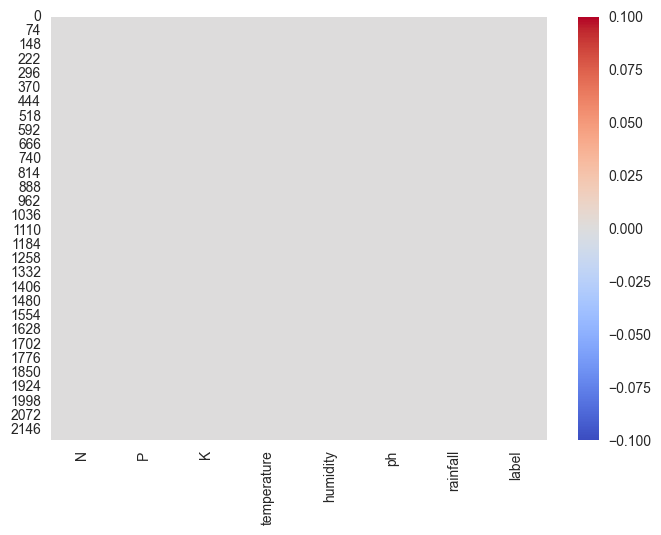

In [ ]:
seaborn.heatmap(df.isnull(), cmap="coolwarm")
matplotlib.pyplot.show()


Let's have a closer look at the distribution of temperature and ph.
    
It is symmetrical and bell shaped, showing that trials will usually give a result near the average, but will occasionally deviate by large amounts. It's also fascinating how these two really resemble each other!

<Axes: xlabel='ph', ylabel='Density'>

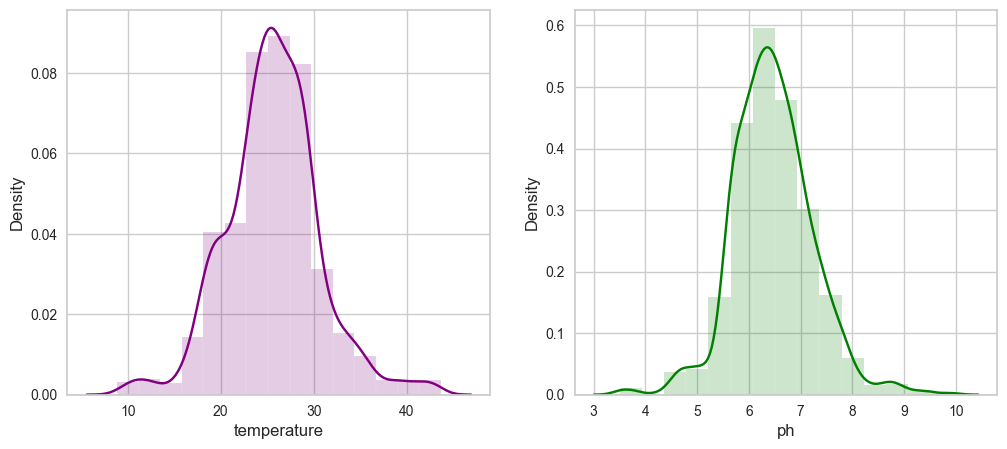

In [ ]:
matplotlib.pyplot.figure(figsize=(12, 5))

matplotlib.pyplot.subplot(1, 2, 1)
# seaborn.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})

seaborn.distplot(df["temperature"], color="purple", bins=15, hist_kws={"alpha": 0.2})

matplotlib.pyplot.subplot(1, 2, 2)
seaborn.distplot(df["ph"], color="green", bins=15, hist_kws={"alpha": 0.2})


A quick check if the dataset is balanced or not.

If it is imbalanced, we will need to  downsample targets which are more frequent.

<Axes: xlabel='count', ylabel='label'>

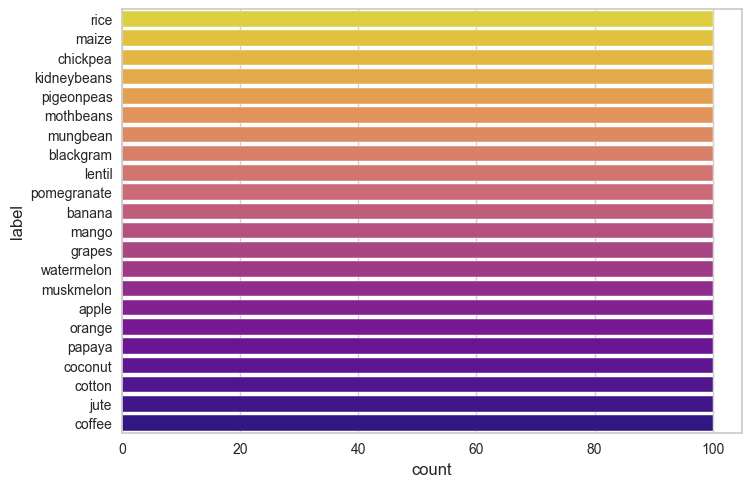

In [ ]:
seaborn.countplot(y="label", data=df, palette="plasma_r")


There does not seem to be an imbalance.

### Master plot to visualize the diagonal distribution between two features for all the combinations!

It is useful to help see how classes differ from each other in a particular space.

KeyboardInterrupt: 

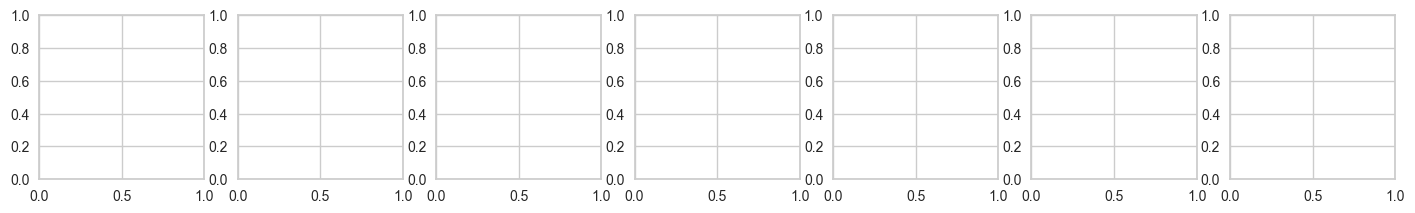

In [ ]:
seaborn.pairplot(df, hue="label")


When it rains, average rainfall is high  and temperature is mildly chill (less than 30'C).

Rain affects soil moisture which affects ph of the soil. Here are the crops which are likely to be planted during this season.

Rice needs <b> heavy rainfall (>200 mm)</b> and a <b>humidity above 80%</b>.

Coconut is a tropical crop. It needs high humidity therefore explaining massive exports from areas like Kerala and Tamil Nadu, which are few coastal areas around the country.

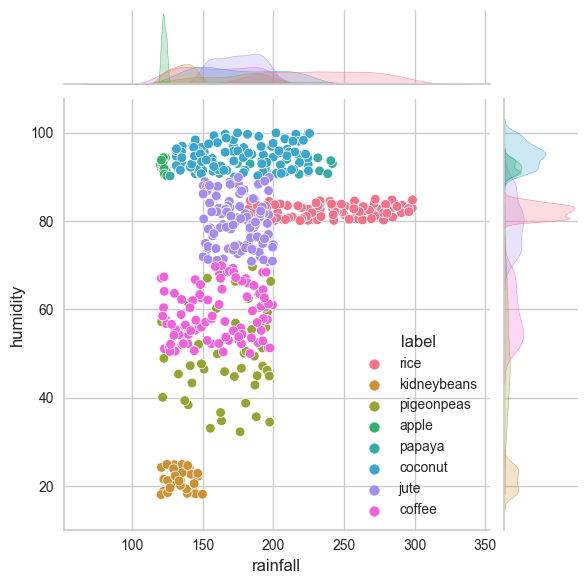

In [ ]:
seaborn.jointplot(
    x="rainfall",
    y="humidity",
    data=df[(df["temperature"] < 30) & (df["rainfall"] > 120)],
    hue="label",
)


This graph shows average values of both potassium (K) and nitrogen (N) (>50).

Fruits which have high nutrients typically has consistent potassium values.

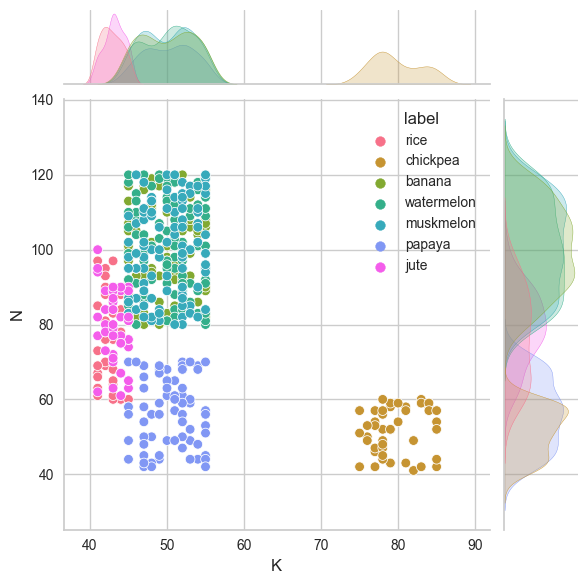

In [ ]:
seaborn.jointplot(x="K", y="N", data=df[(df["N"] > 40) & (df["K"] > 40)], hue="label")


Pairplot between `humidity` and `K` (potassium levels in the soil.)

Using `seaborn.jointplot()` for bivariate analysis, we plot `humidity` and `K` levels based on Label type.

It further generates frequency distribution of classes with respect to features

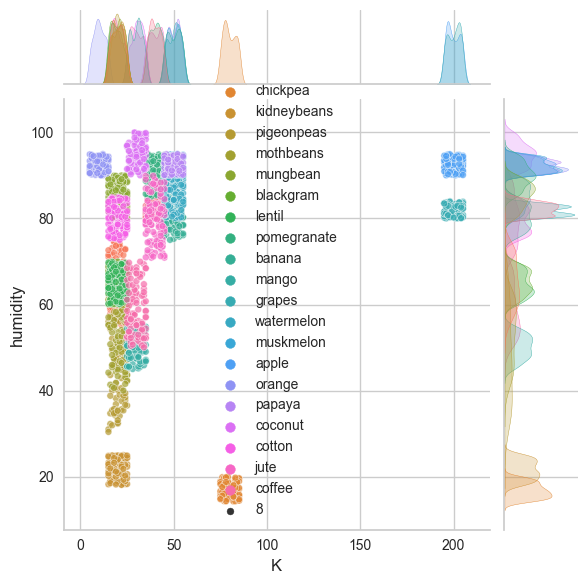

In [ ]:
seaborn.jointplot(x="K", y="humidity", data=df, hue="label", size=8, s=30, alpha=0.7)


<Axes: xlabel='ph', ylabel='label'>

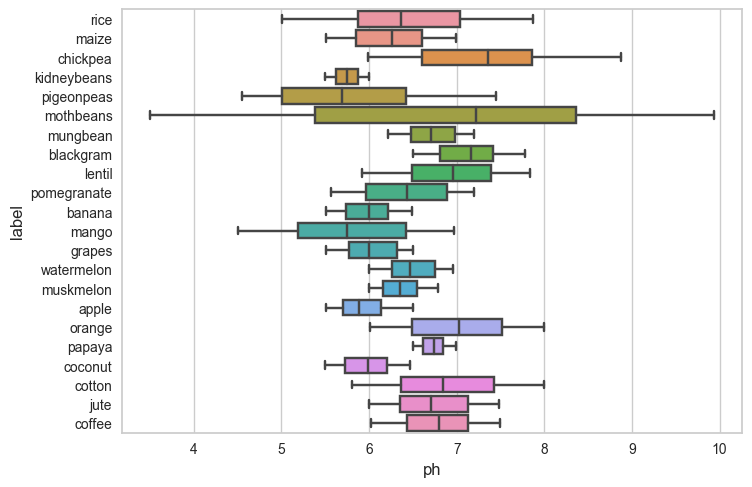

In [ ]:
seaborn.boxplot(y="label", x="ph", data=df)


As visible, `ph` values are critical when it comes to soil. A stability between 6 and 7 is preffered

<Axes: xlabel='P', ylabel='label'>

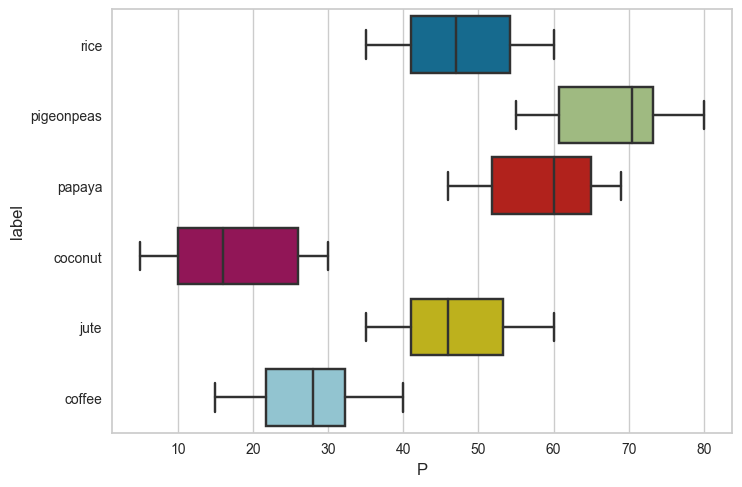

In [ ]:
seaborn.boxplot(y="label", x="P", data=df[df["rainfall"] > 150])


One thing we found during our exploratory analysis stage is that the Phosphorous (`P`) levels are quite differentiable when it rains heavily (above 150 mm).

#### Further analyzing phosphorous levels.

When humidity is less than 65, almost same phosphor levels(approx 14 to 25) are required for 6 crops which could be grown just based on the amount of rain expected over the next few weeks.

<Axes: xlabel='K', ylabel='rainfall'>

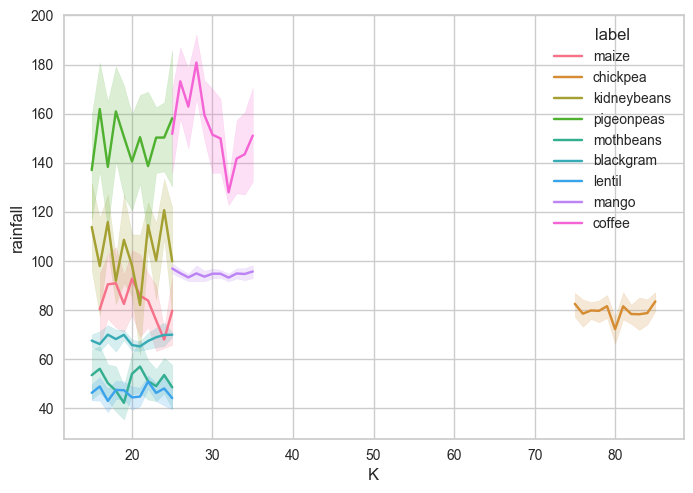

In [ ]:
seaborn.lineplot(data=df[(df["humidity"] < 65)], x="K", y="rainfall", hue="label")


# Pre-processing for ML Model

**Correlation visualization between features. We can see how Phosphorous levels and Potassium levels are highly correlated.**

<Axes: >

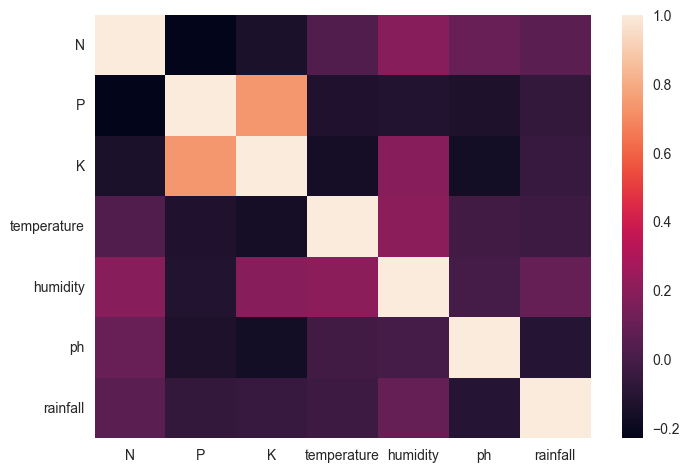

In [ ]:
seaborn.heatmap(X.corr())


# FEATURE SCALING
**Feature scaling is required before creating training data and feeding it to the model.**

As we saw earlier, two of our features (temperature and ph) are gaussian distributed, therefore scaling them between 0 and 1 with MinMaxScaler.

### Let's try different values of n_neighbors to fine tune and get better results

## Classification using Support Vector Classifer (SVC)
<hr>

- Liner kernel seems to be giving satisfactory results, but using fine tuning increases the computation.
- The accuracy can be increased in poly-kernel by tweaking parameters, but it leads to intensive overfitting.
- RBF > linear kernel result wise.
- Best kernel - <b>Poly kernel</b> (by a small margin).

### Let's visualize the import features which are taken into consideration by decision trees.

In [ ]:
matplotlib.pyplot.figure(figsize=(10, 4), dpi=80)
c_features = len(X_train.columns)
matplotlib.pyplot.barh(range(c_features), clf.feature_importances_)
matplotlib.pyplot.xlabel("Feature importance")
matplotlib.pyplot.ylabel("Feature name")
matplotlib.pyplot.yticks(np.arange(c_features), X_train.columns)
matplotlib.pyplot.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 800x320 with 0 Axes>